In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import downcast


%matplotlib inline

sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
flow = pd.read_csv('data/flow.csv', parse_dates=['creation_date', 'sunrise', 'sunset'])
flow = downcast(flow)
incidents = pd.read_csv('data/incidents.csv', parse_dates=['incident_date', 'creation_date', 'sunrise', 'sunset'])
incidents = downcast(incidents)

In [3]:
roads = flow[['road_num', 'began_lat', 'end_lat', 'began_long', 'end_long']].iloc[1:9]

In [4]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30127 entries, 0 to 30126
Data columns (total 23 columns):
description                30127 non-null category
cause_of_incident          1 non-null category
from_road                  30127 non-null category
to_road                    30127 non-null category
affected_roads             13641 non-null category
incident_category_desc     30127 non-null category
magnitude_of_delay_desc    30127 non-null category
length_in_meters           30127 non-null uint16
delay_in_seconds           30127 non-null uint16
incident_date              30127 non-null datetime64[ns]
latitude                   30127 non-null float32
longitude                  30127 non-null float32
datetime                   30127 non-null category
weather_description        29740 non-null category
temperature                29740 non-null float32
atmospheric_pressure       29740 non-null float32
humidity                   29740 non-null float32
wind_speed                 2974

In [5]:
incidents['delay_in_seconds'] = (incidents['delay_in_seconds'] / 60).round(2)
flow['hour'] = flow['creation_date'].dt.hour
flow['weekday'] = flow['creation_date'].dt.dayofweek
incidents['hour'] = incidents['incident_date'].dt.hour
incidents['weekday'] = incidents['incident_date'].dt.dayofweek

In [6]:
major = incidents[incidents['magnitude_of_delay_desc'] == 'major'].copy()
moderate = incidents[incidents['magnitude_of_delay_desc'] == 'moderate'].copy()
minor = incidents[incidents['magnitude_of_delay_desc'] == 'minor'].copy()

In [7]:
major = major.sort_values(by=['delay_in_seconds', 'length_in_meters'], ascending=False)
moderate = moderate.sort_values(by=['delay_in_seconds', 'length_in_meters'], ascending=False)
minor = minor.sort_values(by=['delay_in_seconds', 'length_in_meters'], ascending=False)

In [8]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106112 entries, 0 to 106111
Data columns (total 25 columns):
road_num                      106112 non-null uint8
functional_road_class_desc    106112 non-null category
current_speed                 106112 non-null uint8
free_flow_speed               106112 non-null uint8
speed_diff                    106112 non-null uint8
current_travel_time           106112 non-null int64
free_flow_travel_time         106112 non-null uint16
time_diff                     106112 non-null int64
creation_date                 106112 non-null datetime64[ns]
began_lat                     106112 non-null float32
end_lat                       106112 non-null float32
began_long                    106112 non-null float32
end_long                      106112 non-null float32
weather_description           104800 non-null category
temperature                   104800 non-null float32
atmospheric_pressure          104800 non-null float32
humidity                     

In [9]:
flow.groupby(['weekday', 'hour'])['speed_diff'].mean().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1.771475,1.569378,1.613782,1.607780,1.590400,1.644737,1.986486,5.309562,9.581667,7.801948,...,9.405316,9.266010,12.518092,17.458671,18.097444,10.206400,4.025641,2.257600,1.977636,1.969600
1,1.697600,1.697115,1.571885,1.574400,1.528363,1.571885,2.097245,5.114671,9.202303,8.652104,...,8.499203,8.765823,12.007800,17.768293,18.138508,9.970631,4.141176,2.394428,2.045455,1.508053
2,1.487518,1.383358,1.350954,1.307918,1.408133,1.271341,1.789557,3.906854,9.496795,6.851266,...,8.857961,8.865625,11.346037,15.719512,16.799087,9.429224,4.286585,2.582317,2.391785,1.990385
3,1.646880,1.517504,1.474085,1.360731,1.328704,1.357473,1.733974,4.885802,8.340625,7.436728,...,8.013889,8.723869,11.818740,17.107813,17.650456,11.104688,4.342988,2.566210,2.191456,2.116987
4,1.495253,1.536000,1.362342,1.464455,1.387046,1.363782,1.796474,4.595577,8.293839,6.621835,...,9.381410,10.344156,13.534400,18.455128,19.195513,13.942308,7.036859,3.697115,2.992000,2.679487
5,2.434295,1.873600,1.755200,1.612800,1.607372,1.648000,1.738782,2.074554,2.336000,3.398438,...,4.041118,6.412621,6.480000,7.440878,8.074013,6.132901,4.193333,3.392628,2.952922,3.178914
6,2.742400,2.128000,1.867200,1.689600,1.587859,1.650641,1.498355,1.715655,1.705977,1.876603,...,4.003190,7.328836,7.191248,6.625000,6.636953,4.353323,3.047697,2.684211,1.972800,1.827200


In [10]:
flow.groupby(['weekday'])['current_speed'].mean()

weekday
0    32.416824
1    32.375344
2    32.745614
3    32.530928
4    31.901150
5    34.720962
6    35.429246
Name: current_speed, dtype: float64

In [11]:
incidents.groupby(['weekday']).size()

weekday
0    4744
1    4967
2    4527
3    4722
4    5093
5    3195
6    2879
dtype: int64

In [12]:
major.groupby('hour').size() / len(major)

hour
0     0.000771
1     0.000128
2     0.000514
5     0.000257
6     0.000257
7     0.039316
8     0.098548
9     0.073879
10    0.019658
11    0.019530
12    0.016318
13    0.018887
14    0.034563
15    0.037261
16    0.069510
17    0.198638
18    0.242965
19    0.103816
20    0.011564
21    0.003341
22    0.006296
23    0.003983
dtype: float64

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


hour
0     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
2     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
5     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
6     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
7     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
8     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
9     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
10    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
11    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
12    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
13    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
14    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
15    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
16    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
17    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
18    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
19    [[AxesSubplot(0.125,0.725918;0.215278

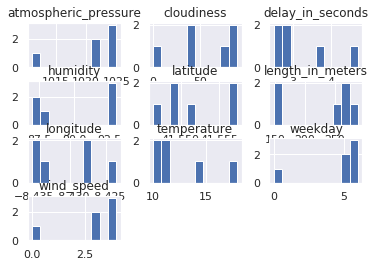

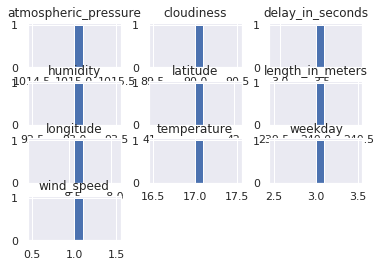

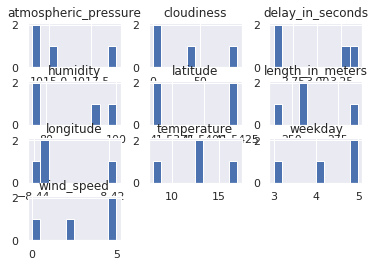

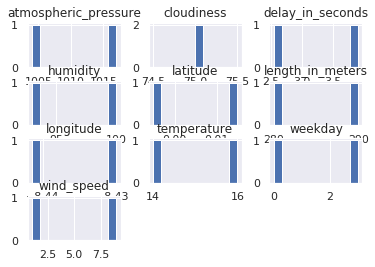

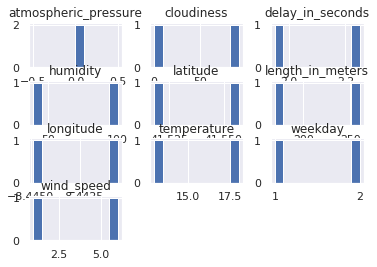

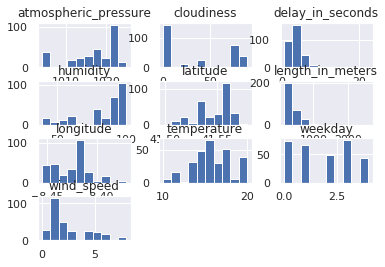

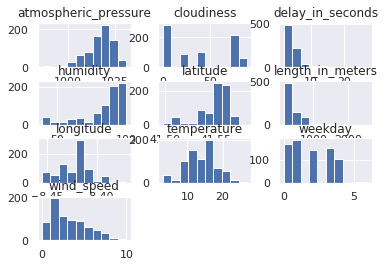

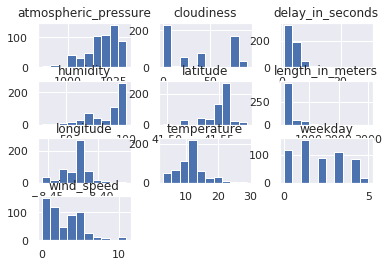

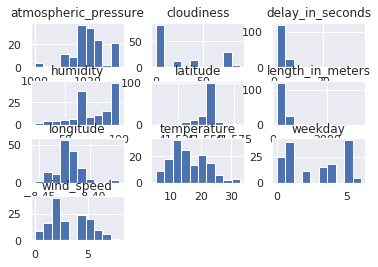

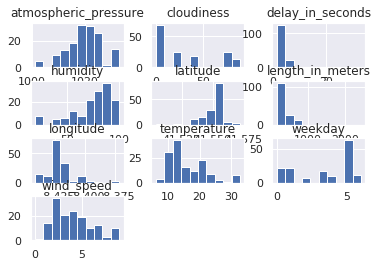

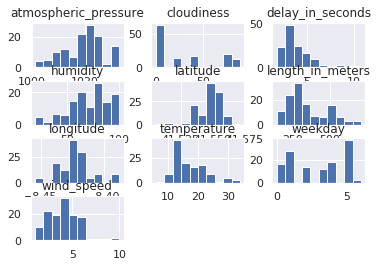

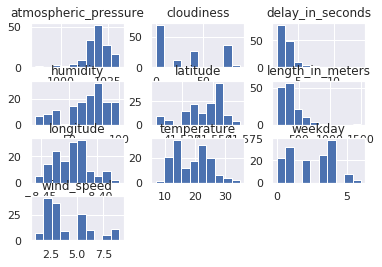

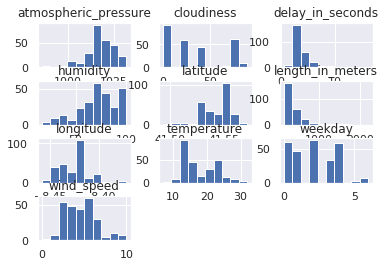

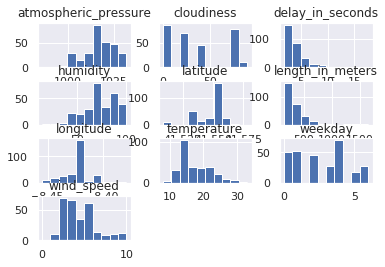

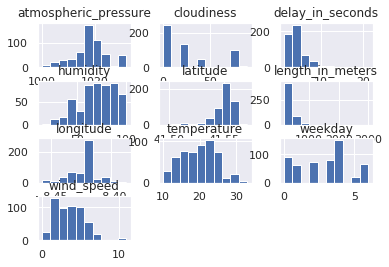

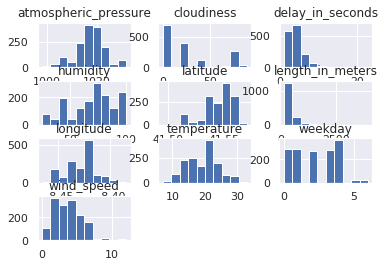

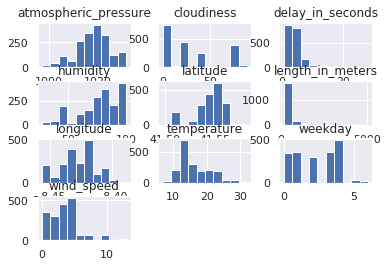

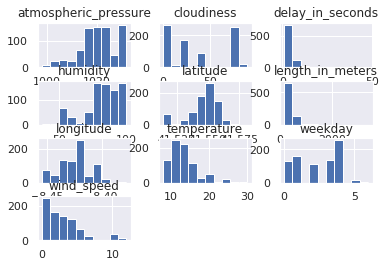

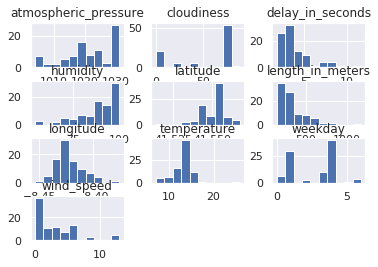

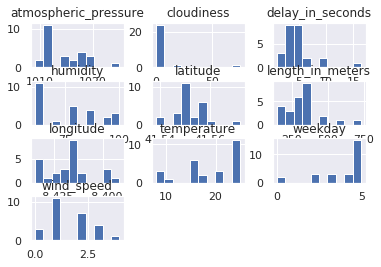

In [ ]:
major.groupby('hour').hist()